#**Explanation:**
1. Data Generation: We generate sample data with 10 features and 1 target variable.
2. Data Split: We split the data into training and validation sets.
3. Standardization: We standardize the features using StandardScaler.
4. Model Architecture: We define a neural network with two hidden layers.
5. Learning Rate Scheduler: We define a custom learning rate scheduler using lr_scheduler.
6. Callbacks: We define callbacks for learning rate scheduling, early stopping, and model checkpointing.
7. Model Compilation: We compile the model with Adam optimizer and mean squared error loss.
8. Model Training: We train the model with the defined callbacks.
#**Callbacks Used:**
####**LearningRateScheduler:** Adjusts the learning rate based on the epoch.
####**EarlyStopping:** Stops training when the validation loss stops improving.
####**ModelCheckpoint:** Saves the best model based on validation loss.
#**Tips and Variations:**
1. Experiment with different model architectures.
2. Try different optimizers and learning rate schedules.
3. Use other callbacks like TensorBoard or ReduceLROnPlateau.
4. Monitor training and validation metrics.
5. Use techniques like batch normalization or dropout regularization.


In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate sample data
#We generate sample data with 10 features and 1 target variable.
np.random.seed(0)
X = np.random.rand(1000, 10)
y = 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(1000)



In [16]:
X.shape, y.shape

((1000, 10), (1000,))

In [17]:
X

array([[0.5488135 , 0.71518937, 0.60276338, ..., 0.891773  , 0.96366276,
        0.38344152],
       [0.79172504, 0.52889492, 0.56804456, ..., 0.83261985, 0.77815675,
        0.87001215],
       [0.97861834, 0.79915856, 0.46147936, ..., 0.94466892, 0.52184832,
        0.41466194],
       ...,
       [0.40931658, 0.8162211 , 0.01154924, ..., 0.3767429 , 0.69770858,
        0.84842039],
       [0.47831657, 0.84636004, 0.54831934, ..., 0.76534181, 0.52550272,
        0.9910432 ],
       [0.69498333, 0.19460689, 0.11403676, ..., 0.75842952, 0.02378743,
        0.81357508]])

In [18]:
y

array([ 2.35099892,  3.99644047,  4.09854007,  2.23758167, -0.36868522,
        2.37369897,  1.24106446,  3.3292267 ,  1.40220019,  2.55600055,
        2.42803382,  3.42426824,  3.03548523,  2.69746564,  2.8834712 ,
        3.09993705,  3.76748305,  1.7734206 ,  2.54648137,  1.61480633,
        2.10135727,  4.68652814,  3.55874744,  2.25808345,  3.61864575,
        3.28740968,  1.55658739,  4.37280601,  2.94263042,  1.70232033,
        4.13378714,  2.90817259, -0.58671211,  2.30181786,  1.19131663,
        1.00006915,  1.6209367 ,  1.03762454,  3.33040939,  1.89809834,
        2.0667526 , -0.25380731,  6.22108817,  0.42596494,  2.91884577,
        3.55955018,  1.63572134,  2.78845536,  1.84711116, -0.24823627,
        1.61877843,  0.89694955,  2.28198854, -0.01071286,  0.04837022,
        1.07671533,  2.25289684,  2.92409923,  1.28410805,  3.23105044,
        0.17565827,  1.97376487,  0.96149501, -0.20944133,  3.51191773,
        3.35952143,  4.18442918,  3.89867455,  3.18504031,  2.48

#**WHAT DO YOU MEAN BY FIT??**

###Fitting a model or transformer to training data means estimating its parameters or learning its relationships from the training data.
#What happens during fitting:
1. **Parameter estimation:** The model or transformer estimates its parameters (e.g., weights, biases) from the training data.
2. **Learning relationships:** The model or transformer learns patterns and relationships within the training data.

#Types of fitting:
1. Supervised learning: Models learn to predict target variables from input features.
2. Unsupervised learning: Models learn patterns or structure in the data without target variables.
#Examples of fitting:
1. Linear Regression: Estimates coefficients (weights) to predict continuous target variables.
2. Decision Trees: Learns split points and leaf values to classify or regress target variables.
3. StandardScaler: Estimates mean and standard deviation to standardize features.
#Why fitting is important:
1. Accurate predictions: Fitting enables models to make accurate predictions on unseen data.
3. Generalization: Fitting helps models generalize to new, unseen data.
Improved performance: Fitting optimizes model parameters for better performance.

#**FIT_TRANSFORM  VS TRANSFORM**
####fit_transform and transform are two essential methods in scikit-learn's preprocessing module.
#fit_transform:
1. **Fits** the transformer to the data: estimates parameters (e.g., mean, variance) from the data.

2. **Transforms** the data: applies the estimated parameters to transform the data.

#transform:
Applies the already estimated parameters to transform new data.

#Key differences:

1. **Estimation:** fit_transform estimates parameters, while transform uses existing estimates.

2. **Data:** fit_transform is used on training data, while transform is used on testing or new data.

####fit_transform estimates the mean and scale from X_train and transforms it.
###transform applies the estimated mean and scale to transform X_test.
#Best Practices:
1. Use fit_transform on training data.
2. Use transform on testing or new data.
3. Avoid using fit_transform on testing data.
#Common Methods:

StandardScaler

MinMaxScaler

RobustScaler

LabelEncoder

OneHotEncoder

#Additional Tips:
1. Use pipelines: Streamline preprocessing and modeling with pipelines.
2. Validate: Use techniques like cross-validation to ensure generalization.
3. Monitor: Track performance metrics and data distributions.
#Key Takeaways:
1. Separate preprocessing: Keep training and testing data separate.
2. Avoid data leakage: Prevent testing data from influencing training.
3. Ensure generalization: Validate models on unseen data.
#Common Mistakes:
1. Fitting on testing data
2. Not validating models
3. Ignoring data leakage
#Best Practices:
1. Use fit for training data
2. Use transform for testing data
3. Validate models regularly

In [19]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [20]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((900, 10), (100, 10), (900,), (100,))

In [21]:
X_train

array([[0.92942836, 0.74454269, 0.54600978, ..., 0.21404058, 0.17231153,
        0.80879638],
       [0.99217751, 0.58912362, 0.92344193, ..., 0.83596457, 0.42889809,
        0.7129967 ],
       [0.11753796, 0.48128344, 0.81640963, ..., 0.8943867 , 0.91612422,
        0.50463316],
       ...,
       [0.12348677, 0.46224728, 0.65483252, ..., 0.1750099 , 0.90756512,
        0.4832537 ],
       [0.04252509, 0.43254571, 0.41248046, ..., 0.88636533, 0.6679426 ,
        0.42244379],
       [0.23583422, 0.6204999 , 0.63962224, ..., 0.18534859, 0.99581529,
        0.12935576]])

In [30]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [32]:
# Define model architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Define learning rate scheduler
def lr_scheduler(epoch):
    if epoch < 50:
        return 0.001
    elif epoch < 100:
        return 0.0005
    else:
        return 0.0001

# Define callbacks
callbacks = [
    keras.callbacks.LearningRateScheduler(lr_scheduler),
    keras.callbacks.EarlyStopping(patience=20, min_delta=0.001),
    keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
]

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train,
                    epochs=150,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=callbacks,
                    verbose=1)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 5.2979 - val_loss: 3.7336 - learning_rate: 0.0010
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.8836 - val_loss: 2.6242 - learning_rate: 0.0010
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7913 - val_loss: 1.9717 - learning_rate: 0.0010
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1691 - val_loss: 1.6638 - learning_rate: 0.0010
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9014 - val_loss: 1.5444 - learning_rate: 0.0010
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6762 - val_loss: 1.4523 - learning_rate: 0.0010
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5366 - val_loss: 1.3257 - learning_rate: 0.0010
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4067 - val_loss: 1.2150 - learning_rate: 0.0010
Epoch 9/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2948 - val_loss: 1.1458 - learning_rate: 0.0010
Epoch 10/150
8/8 ━━━━━━━━━━━━━━━━━━

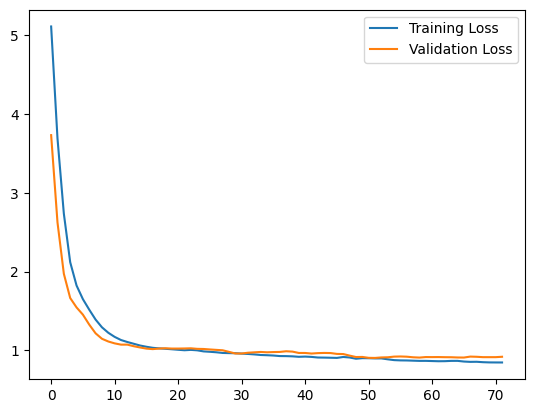

In [33]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()